# Problem Set 2 Solutions

# Exercise 1: Do Microfinance Loans Affect Expenditure?

### Most of the world's poor have limited access to formal credit. Traditionally, they have had to resort to their social networks (family, friends) or local moneylenders that charge exorbitant interest rates (upwardsof 100%). This often prevents individuals from making investments in potential businesses or productive assets. In the last 15 years, microfinance institutions (MFI) have emerged all across the developing world to address this problem. The basic model of a microfinance institution (such as the Grameen Bank) is to provide small loans to a group of potential borrowers at much lower interest rates. The number of very poor families with a microloan has grown exponentially: from 7.6 million in 1997 to 137.5 million in 2010. Micro-credit has been heralded as a major advance in the reduction of global poverty. However, in recent years, critiques have emerged accusing micro-finance institutions of acting irresponsibly by holding the poor to very strict repayment schedules and charging unreasonably high interest rates. So where does this leave us? Does micro-credit help or hinder? In the January 2015 issue of the American Economic Journal: Applied Economics, six papers evaluating the merits of micro-credit were released. We will explore the results from one of these papers by Augsburg et al., which evaluates a microfinance institution in Bosnia and Herzegovina.

# Data Description

### The data for this exercise comes from a study conducted in Bosnia and Herzegovina investigating the effects of a small loan on access to liquidity; self-employment and income; labor supply; expenditure and savings. These were individual-liability loans with monthly repayments and an interest rate of 22%. The sample consists of potential borrowers (who were just marginally eligible for loans). Approximately half the sample was randomly selected to receive the loan (the treatment group), while the other half did not receive anything (control group). You have a subsample of individuals (both in the treatment and control group) that the researchers used for their analysis. The respondent (= the loan applicant) answered questions about the household they belonged to as well (no two respondents are from the same household). The PS2_MFI.dta file includes the following variables:

• `treatment` : dummy equal to 1 if the respondent is in the treatment group (which received a loan)

• `resp_female`: dummy equal to 1 if the respondent is female

• `resp_age`: the respondent's age

• `hhmem`: number of household members

• `hhmem_adults`: number of adults in household ($\geq$14)

• `hhmem_children`: number of children in household (<14)

• `hhmem_elderly`: number of elderly in household (>64)

• `total_exp`: total annual household expenditure in Bosnian Convertible Marka (BAM)

• `food_exp`: annual household expenditure on food in BAM

• `nondur_exp`: annual household expenditure on nondurables (rent, fuel, transport, clothes, insurance...) in BAM

• `dur_exp`: annual household expenditure on durables (education, furniture, vehicle...) in BAM

• `temp_exp`: annual household expenditure on temptation goods (cigarettes, tobacco, alcohol) in BAM

### The prevailing exchange rate at the time of the study was approximately US$1 = 1.63 BAM.

# Question 1

Load the dataset `PS2_MFI.dta`. Notice that this is a `.dta` file so you will need to use the `haven` package.

In [13]:
library(haven)
ps2<-read_dta("PS2_MFI.dta")
head(ps2)

intervid,treatment,resp_female,resp_primary,resp_secondary,resp_tertiary,resp_noschool,resp_age,resp_married,resp_emp,⋯,hhmem_unemployed,hhmem_retired,hhmem_school,total_exp,food_exp,nondur_exp,dur_exp,temp_exp,savings_avg,followup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1,1,1,0,0,0,29,0,0,⋯,1,0,2,5740,2080,960,1400,1300,0,1
4,0,0,0,0,1,0,49,0,0,⋯,2,0,2,34678,30160,4488,30,0,500,1
6,0,0,1,0,0,0,24,1,1,⋯,0,0,0,9180,2600,420,4340,1820,0,1
7,0,0,0,1,0,0,45,0,1,⋯,0,0,0,12696,9360,1812,900,624,0,1
8,1,0,1,0,0,0,52,0,1,⋯,0,0,2,2960,2600,360,0,0,0,1
13,1,0,0,1,0,0,18,1,1,⋯,0,0,1,9188,7800,360,300,728,500,1


In [14]:
colnames(ps2)

[1] "intervid"         "treatment"        "resp_female"      "resp_primary"    
 [5] "resp_secondary"   "resp_tertiary"    "resp_noschool"    "resp_age"        
 [9] "resp_married"     "resp_emp"         "hhmem"            "hhmem_adults"    
[13] "hhmem_children"   "hhmem_elderly"    "hhmem_employed"   "hhmem_unemployed"
[17] "hhmem_retired"    "hhmem_school"     "total_exp"        "food_exp"        
[21] "nondur_exp"       "dur_exp"          "temp_exp"         "savings_avg"     
[25] "followup"

### a) How many respondents are in your data set? How many respondents are females? What is the mean age among the respondents in the sample? What is the mean number of household members among respondents in your sample?

In [2]:
nrow(ps2) #number of respondents
mean(ps2$resp_female) #gender
mean(ps2$resp_age, na.rm=T) #age
nrow(ps2[is.na(ps2$resp_age),]) #missing values in age
mean(ps2$hhmem) #household members

[1] 597

[1] 0.4070352

[1] 37.37248

[1] 1

[1] 3.623116

There are 597 respondents in the data set. 40.7% of them are female. The average age of respondents is 37.3 (noting that we are missing age infomation on 1 respondent). On average a respondent's household has 3.62 members.

### b) Construct a variable `total_exp_pc` equal to total expenditures per capita in BAM. Plot a histogram (Hint: use the `hist()` command) of this constructed variable. What is the range of household total expenditures per capita? (You may want to refer to US Dollars in the discussion, so as to make sense of the income level of these MFI clients).

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  421.4  1705.0  2887.0  3973.0  4530.0 34160.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  258.5  1046.0  1771.0  2437.0  2779.0 20960.0 

[1] 20698.51

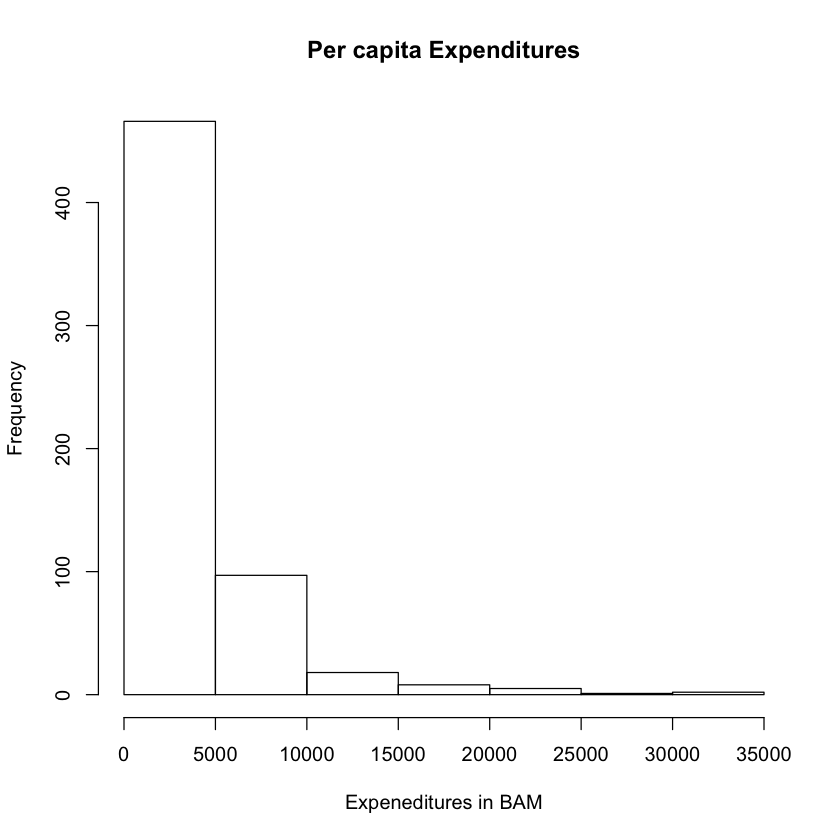

In [3]:
ps2$total_exp_pc<-ps2$total_exp/ps2$hhmem #Create variable
summary(ps2$total_exp_pc) #summarize values in BAM
summary(ps2$total_exp_pc/1.63) #summarize values in dollar equivalent
(max(ps2$total_exp_pc)-min(ps2$total_exp_pc))/1.63 #calculate range in dollar equivalent

hist(ps2$total_exp_pc,
    main = "Per capita Expenditures",
    xlab = "Expeneditures in BAM")



Per capita expenditures in the sample ranges from 421.4 BAM to 34160.0 BAM, which is approximately \$ 258 to \$ 20,960, for a range of \$20698.51.

### c) Calculate the proportion of household expenditures spent on non-durable goods (education, furniture, repairs, vehicle, appliances). You will need to create this new variable. What is the mean? What is the median? Compare the mean value of these proportions among treatment and control households.

In [12]:
ps2$frac_nondur<-ps2$nondur_exp/ps2$total_exp

summary(ps2$frac_nondur) ##summary stats for total population

summary(ps2[ps2$treatment==0,]$frac_nondur) ##Summary stats for control
summary(ps2[ps2$treatment==1,]$frac_nondur) ##Summary stats for treatment



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00813 0.09331 0.18220 0.21240 0.28300 0.93260 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00858 0.09418 0.17900 0.20570 0.27780 0.70410 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00813 0.09334 0.18500 0.21770 0.29200 0.93260 

[1] "My value is" "4"

In the full population, an average of 21.2 $\%$ and a median of 18.2 $\%$ of household expenditures are spent on non-durables. Both the mean and median values are about 1 percentage point higher in the treatment group.

# Question 2

### We will now explore the role of household size in food consumption. Consider these two models: 

Model 1: $\ln( $ food_exp_pc $ ) = \beta_0 + \beta_1 \ln($ total_exp_pc $) + \beta_2 $ treatment $ + u $

Model 2: $\ln($ food_exp_pc$) = \beta_0 + \beta_1 \ln($total_exp_pc$) + \beta_2$ treatment$ + \beta_3 \ln($hhmem$) + u $

### a) Estimate equations (1) and (2).

In [5]:
ps2$food_exp_pc<-ps2$food_exp/ps2$hhmem

model1<-lm(log(food_exp_pc)~log(total_exp_pc)+treatment, data=ps2)
summary(model1)

model2<-lm(log(food_exp_pc)~log(total_exp_pc)+treatment +log(hhmem), data=ps2)
summary(model2)


Call:
lm(formula = log(food_exp_pc) ~ log(total_exp_pc) + treatment, 
    data = ps2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.16572 -0.23989  0.09223  0.32982  0.79996 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.71071    0.19621   3.622 0.000317 ***
log(total_exp_pc)  0.83185    0.02415  34.452  < 2e-16 ***
treatment         -0.03878    0.03709  -1.046 0.296186    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4489 on 594 degrees of freedom
Multiple R-squared:  0.6693,	Adjusted R-squared:  0.6682 
F-statistic:   601 on 2 and 594 DF,  p-value: < 2.2e-16



Call:
lm(formula = log(food_exp_pc) ~ log(total_exp_pc) + treatment + 
    log(hhmem), data = ps2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.22709 -0.24332  0.07568  0.31814  0.93587 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.36345    0.24908   5.474 6.50e-08 ***
log(total_exp_pc)  0.77565    0.02738  28.333  < 2e-16 ***
treatment         -0.03604    0.03659  -0.985    0.325    
log(hhmem)        -0.17457    0.04192  -4.164 3.59e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4428 on 593 degrees of freedom
Multiple R-squared:  0.6787,	Adjusted R-squared:  0.677 
F-statistic: 417.5 on 3 and 593 DF,  p-value: < 2.2e-16


### b) Interpret the estimated parameters of equation (2). The results you are finding on the role of household size may a priori seem suprising. Try to think about a scenario whereby two households of the same size, with the same total expenditures per capita decide to move in together. What does your estimation predict about food consumption per capita?

$\hat{\beta_0}$ tells us that if a household's per capita expenditures is equal to 1 BAM, treatment status is equal to control, and household members are equal to 1, we would predict that their food consumption expenditures would be 3.9BAM (\$2.39 USD). $\hat{\beta_1}$ tells us that holding household members and treatment status constant, a 1$\%$ increase in per capita expenditures increases per capita food expenditures by 0.77$\%$. $\hat{\beta_2}$ tells us that being in the treatment group (holding per capita expenditures and number of household members fixed) decreases per capita food expenditures by 3.6$\%$. Finally, $\hat{\beta_3}$ tells us that holding treatment status and total per capita expenditure fixed, a 1$\%$ increase in the number of household members leads to a 0.17$\%$ decrease in food expenditures per capita. 

If these two households move in together, the household size doubles (increases by 100$\%$) while per capita expenditures (and implicitly treatment status) stay the same. Hence we expect per capita food expenditures to decrease by 17.4$\%$.

### c) How did your estimate of $\hat{\beta}_1$ change between equation (1) and equation (2)? Without performing any calculations, what information does this give you about the correlation between total expenditure per capita and household size? (Explain your reasoning in no more than 4 sentences.)

$\hat{\beta_1}$ goes from 0.83 in Model 1 to 0.77 in Model 2, meaning we had an upward bias before including a control for total household members. Given the difference in the estimates, it seems that model 1 suffered from omitted variable bias (a violation of MLR 4). We see in model 2 that $\log(hhmem)$ is negatively correlated with $\log(food\_exp\_pc$.  Hence we can infer that the correlation between total expenditures per capita and household size is negative. 

### d) Predict the expected value of food expenditure of a control household with 3 members and total annual expenditure per capita of BAM 3000 using your estimates from equation (2).

In [6]:
exp(model2$coefficients[1]+model2$coefficients[2]*log(3000)+model2$coefficients[3]*0+model2$coefficients[4]*log(3))


(Intercept) 
    1606.54

For this household, we would predict per capita food expenditures to be 1,606.53 BAM (approx \$ 982).

# Question 3

### A country's dependency ratio is the ratio of old and young dependents (dependents are those not in the labor force) to the working-age population. A similar measure could be constructed for the household: 

$hhdr =\frac{\text{hh members under 14 or over 64}} {\text{hh members aged 14 to 64}}$ 

### Model 2 (as well as Model 1) does not capture how the composition of a household, i.e. the characteristics of the members, is associated with food consumption per capita. You suspect that the structure of the family affects food expenditure per capita controlling for the log of household size and the log of total expenditure per capita (think about how children and older people might consume less food than adults; and how larger households might have more children). Specifically you hypothesize that a higher dependency ratio is associated with lower food expenditure per capita. 

### (a) Write an equation you could estimate that would test this hypothesis.

$\ln($ food_exp_pc$) = \beta_0 + \beta_1 \ln($total_exp_pc$) + \beta_2 \ln($hhmem$) +\beta_3 hhdr + u $ 

### (b) Estimate the equation in part (a). What can you conclude about the hypothesis?

In [7]:
ps2$hhdr<- (ps2$hhmem_children+ps2$hhmem_elderly)/(ps2$hhmem_adults-ps2$hhmem_elderly)
ps2[which(ps2$hhdr==Inf),]$hhdr<-NA
summary(ps2$hhdr)
model3<-lm(log(food_exp_pc)~log(total_exp_pc)+log(hhmem)+hhdr, data=ps2)
summary(model3)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.3333  0.4625  1.0000  3.0000       4 


Call:
lm(formula = log(food_exp_pc) ~ log(total_exp_pc) + log(hhmem) + 
    hhdr, data = ps2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.23764 -0.23648  0.08115  0.31953  0.94111 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.25633    0.24811   5.064 5.51e-07 ***
log(total_exp_pc)  0.78559    0.02744  28.633  < 2e-16 ***
log(hhmem)        -0.18762    0.04482  -4.186 3.27e-05 ***
hhdr               0.04967    0.03874   1.282      0.2    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4413 on 589 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.6802,	Adjusted R-squared:  0.6786 
F-statistic: 417.6 on 3 and 589 DF,  p-value: < 2.2e-16


Our null hypothesis is that $\beta_3=0$. Note that with a t-statistic of 1.282, we fail to reject the null hypothesis, at the 5\% level. 

# Exercise 2: Perception on Global Warming

### Gallup Polling collects information about a variety of topics ( health, environment, political attitudes, education). In March 2018, Gallup conducted a poll to gather information about the perceived onset of global warming among Californian voters. Question: Do you believe that global warming is caused by human activities?

|  Group      | Number of Observations  | Yes |
|-------------|-------------------------|-----|
|  All voters |  1108                   | 697 |
| Republicans |  382                    | 133 |  
| Democrats   |  421                    | 375 | 
| Independents|  305                    | 189 |


### Consider first the overall result (all voters). Let p be the fraction of voters that believe that global warming is caused by human activities.

 Note: You answer to the following questions should not necessarily require any R code (unless you would like to use R as a calculator). Some of your answers will require that you type in equations. Latex is a typsetting language that makes nicely formatted equations. At the begining and end of an equation you will need to type a $\$$  to tell Jupyter that you are typing a Latex equation. The following website has some simple examples showing you how to format your equations in Latex:  http://www.personal.ceu.hu/tex/cookbook.html . 

### (a) Use the survey results to estimate p.

In [8]:
p_hat<-697/1108
p_hat


[1] 0.6290614

$\hat{p}=0.63$


### (b) Construct a 95% confidence interval for p. Interpret.

In [9]:
se_p_hat<-sqrt((0.63*(1-0.63))/1108)

left_side<-p_hat-1.96*se_p_hat
right_side<-p_hat+1.96*se_p_hat

print(paste0("[", left_side, ",", right_side, "]"))


[1] "[0.600632650410777,0.657490093271534]"


Using the z-table, for two-sides, with 95% confidence level, $c= 1.96.$ Hence we can calculate the standard error of $\hat{p}$, and plug it into our confidence interval formula to get the confidence interval displayed above.


### (c) Suppose you want to test the null hypothesis that 85% of Democrats believe that global warming is caused by human activities against the alternative hypothesis that more than 85% of Democrats believe that global warming is caused by human activities. Write down the null and alternative hypotheses. Is this a one-sided or two-sided test?

The hypothesis are:
$$H_0=p\_dem=0.85 $$
$$H_1=p\_dem\geq 0.85 $$

This is a one-sided test.

### (d) Generate a test statistic which will allow you to test the null hypothesis that more than 85% of Democrats believe that global warming was caused by human activities, and identify a critical value which will give you 99% confidence.

In [10]:
p_dem_hat<-375/421

t_stat<-(p_dem_hat-0.85)/sqrt((0.85*(1-0.85))/421)
t_stat

[1] 2.34082

Using the same intuition of the questions above, we calculated a test statistic thusly. Additionally, using a t-table, we note that the critical value for a 99% one-sided (negative) test is -2.33.

### (e) Implement your test and interpret your results.

Comparing the test statistic and the critical value:
$$2.3>-2.33 $$
Therefore, we fail to reject the null. We do not have statistical evidence at the 1% level that more than 85%
of democrats do not believe that global warming was caused by human activities.